In [123]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [200]:
# load data 
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
df.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
128,1,117,88,24,145,34.5,0.403,40,1
274,13,106,70,0,0,34.2,0.251,52,0
100,1,163,72,0,0,39.0,1.222,33,1


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [126]:
# split data
x = df.drop('Outcome' , axis = 1 )
y = df['Outcome']

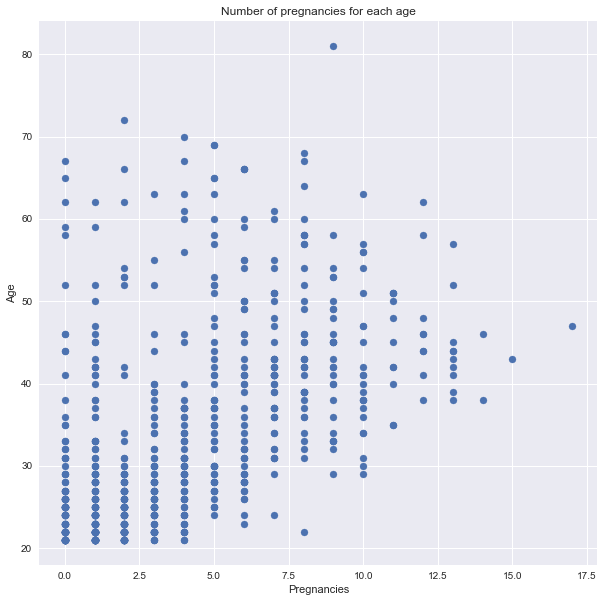

In [127]:
# perfome EDA  # graph 1 
x_1 = df['Pregnancies']
y_1 = df['Age']
plt.figure(figsize=(10,10));
plt.title('Number of pregnancies for each age');
plt.xlabel('Pregnancies');
plt.ylabel('Age')
plt.scatter(x_1,y_1);
# the graph shows the number of pregnancies for each year and is illustrated a few number of women who pregnancies
# more than 10 times also there outlier in 17 times 
# and the range of age is from 20 to 50 

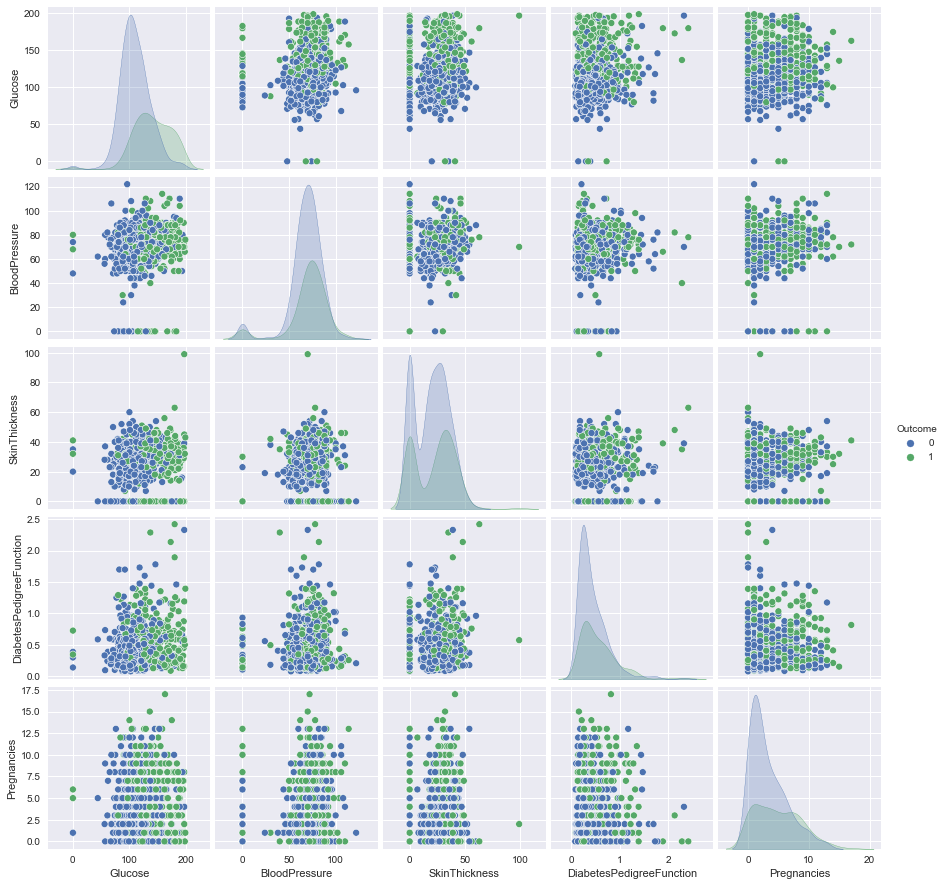

In [128]:
#graph two
sns.pairplot(df[['Glucose','BloodPressure','SkinThickness','DiabetesPedigreeFunction','Pregnancies','Outcome']] 
             , hue = 'Outcome');
# this graph been very useful because the shows the relationship for different variable
# the blue color mean who diagnosed for kidney disease and the orange for not diagnose
# the aim of project is diagnostically predict
# is hard from graph to choose the most common factor 

In [129]:
# basline model 
df['Outcome'].value_counts(normalize=True) #  the precentage of model is 65%

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [130]:
# scale the data 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(x)

In [131]:
# split data for Logistic
x_train,x_test,y_train,y_test,= train_test_split(x,y,train_size= 0.8,random_state =42)

In [150]:
# Create a Logistic Regression model
lr = LogisticRegression();
lr.fit(x_train,y_train);
#pre = lr.predict(x_test)

C:\Users\Amjad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
# score
score_logestic = lr.score(x_test,y_test) # the accurecy is 74% for the logestic mode
score_logestic                        # is higher than basline model 

0.7467532467532467

In [156]:
# Perform PCA
pca = PCA()
pcs = pca.fit_transform(scaled_df)

In [157]:
#Create a Scree Plot
# pcs series
series = pd.Series(pca.explained_variance_ratio_)
series

0    0.261797
1    0.216401
2    0.128704
3    0.109441
4    0.095293
5    0.085329
6    0.052477
7    0.050558
dtype: float64

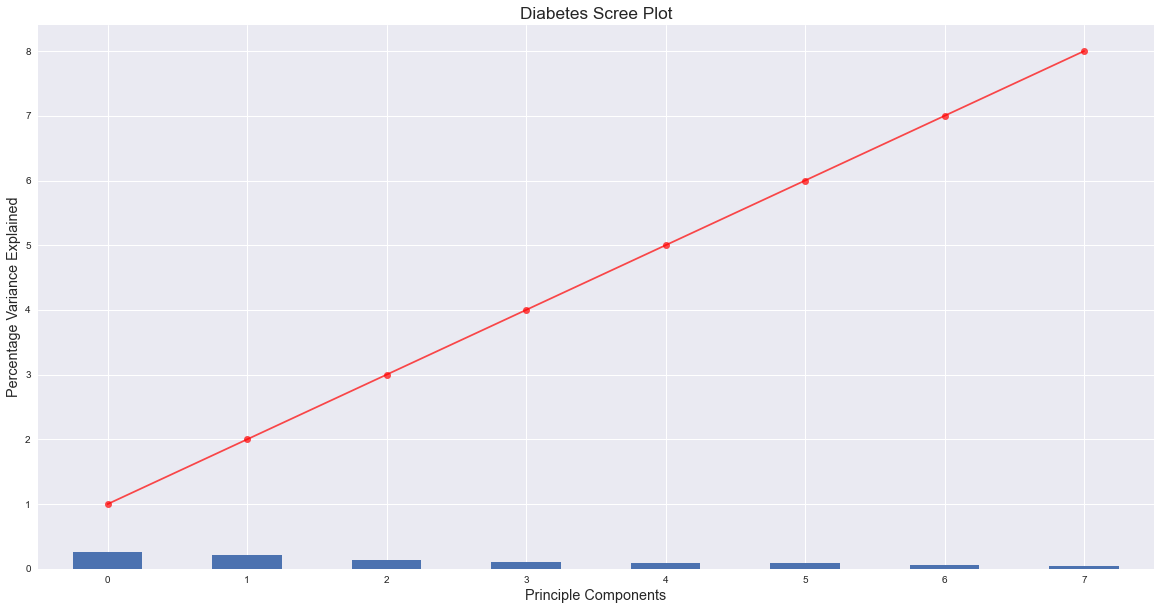

In [161]:
# plot
plt.style.use("seaborn");
plt.figure(figsize=(20,10));
series.plot(kind = 'bar');
#calculte amount of variance
total = 0
var = []
for x in series:
    total = total + 1
    var.append(total)
var_1 = pd.Series(var)
var_1.plot(marker="o", alpha=0.7, color = 'red');
plt.xlabel("Principle Components", fontsize="x-large");
plt.ylabel("Percentage Variance Explained", fontsize="x-large");
plt.title("Diabetes Scree Plot", fontsize="xx-large");

In [198]:
# Logistic Regression model # we already spliting the data 
# fit & transform data
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)
#fit pca
pca_1 = PCA()
x_train_pca = pca_1.fit_transform(x_train_s)
x_test_pca = pca_1.fit_transform(x_test_s)

In [199]:
#create a model
lr_pca = LogisticRegression(max_iter= 2000)
lr_pca.fit(x_train_pca,y_train);
# pre_pca = lr_pca.predict(x_test_pca)
# score
lr_pca.score(x_test_pca,y_test) # the accurecy is very low

0.538961038961039

## Compare results to the baseline and previous Logistic Regression Model without PCA and provide an explanation of what the results mean and the point of PCA

In [202]:
# basline model 
print('baseline:', df['Outcome'].value_counts(normalize=True))#  the precentage of model is 65%
#Logistic without pca
print('Logistic:', lr.score(x_test,y_test))
#Logistic with pca
print('Logistic_PCA:', lr_pca.score(x_test_pca,y_test)) # the logeistic model without PCA have highest score
                                                        # that is mean we need all feature to raise the accurecy 
                                                        # because PCA choose just 7 and we not have the best accurecy

baseline: 0    0.651042
1    0.348958
Name: Outcome, dtype: float64
Logistic: 0.7467532467532467
Logistic_PCA: 0.538961038961039
